## Credit Card Fraud - Final Flatiron Project (Alexander Benn)

Utilising machine learning to discover credit card fraud from a Kaggle dataset (https://www.kaggle.com/mlg-ulb/creditcardfraud)

The intention of this project is to demonstrate the use of classifier machine learning models in the finance and legal sectors. I have attempted to build a model which will predict credit card fraud with reliable accuracy, in order to target suspicious activities for investigation. To this end I have made a random forest model which will make the necessary decisions to categorise a spending event as either fraud, or not-fraud. This will both save people and banks money, as well as finding out individuals who are committing, or being coerced into, this offence. 

The anonymous nature of this dataset makes it hard to generate concrete solutions for this specific project, but I have successfully identified several sigificant variables. If I were to acquire uncensored data, could be targets for future specific analysis. 

In [3]:
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO 
from subprocess import call

import numpy as np
import pandas as pd
import itertools

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_curve
from yellowbrick.model_selection import feature_importances
from sklearn.ensemble import RandomForestClassifier


from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances


from sklearn import tree
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')


/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Libraries imported

## Step one - Exploratory Data Analysis, Cleaning and Class Imbalance

The initial step for any data science project is the importing and initial analysis of the data. This includes checking for missing values, exploring the type of data and so on

In [29]:
df = pd.read_csv('creditcard.csv')
df.isnull().values.any()

False

0    284315
1       492
Name: Class, dtype: int64


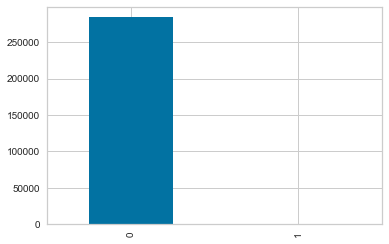

In [30]:
l = df[('Class')]
print(l.value_counts())
df['Class'].value_counts().plot.bar()
plt.show()

In [10]:
print('Raw counts: \n')
print(df['Class'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df['Class'].value_counts(normalize=True))

Raw counts: 

0    284315
1       492
Name: Class, dtype: int64
-----------------------------------
Normalized counts: 

0    0.998273
1    0.001727
Name: Class, dtype: float64


As we can see here, there is a major class imbalance between 0, representing no fraud, and 1, representing fraud. This is reflective of the real-world situation where fraud is much less common than crime dramas would have us believe! This issue will be addressed later in the notebook with a solution just prior to modelling.

In [11]:
print(df.columns)
df.dtypes
# This is to show the types of data we are working with, so that we are sure there will be no computing errors

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

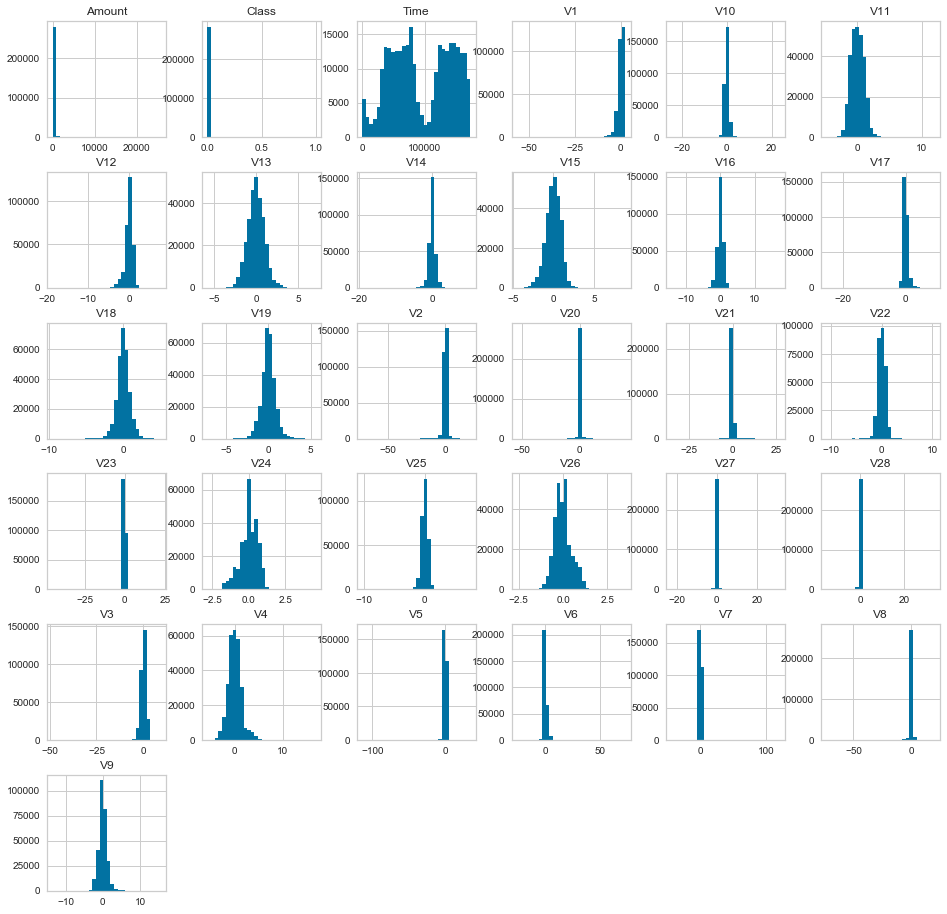

In [12]:
df.hist(bins=30, figsize=(16,16))
plt.show()
# A grid visualisation to show the distributions of each feature in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1487f7350>]],
      dtype=object)

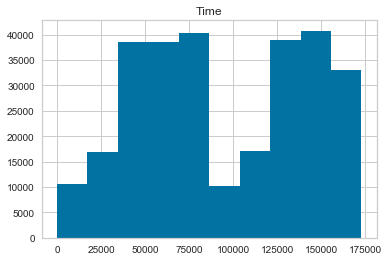

In [38]:
df.hist(column='Time')

As we can see from the above visualisation, there is a noticible 'dip' overnight on the dataset. This reflects the speniding habits of most people, and so we can be reasonably sure that the dataset we have been provided is an accurate reflection of reality, rather than a purely academic exercise

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1480517d0>]],
      dtype=object)

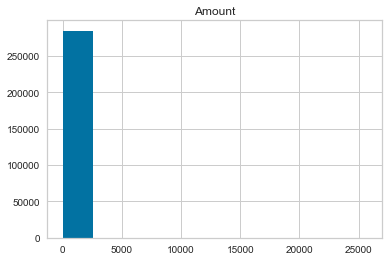

In [39]:
df.hist(column='Amount')

This histogram is to demonstrate the economic volumes we are dealing with. As is clear, there is not a vast quantity of money at stake here, thereby demonstrating that we are dealing with petty, small scale fraud, as opposed to international money laundering or somesuch.

Next we are going to examine the correlations between the variables and the 'target' value, which in this case is the confirmed presence of fraud. We will do this via a 'correlation matrix', which is a way of demonstrating to what extent the features can be excluded based on a suspciously 'too high' correlation. 

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


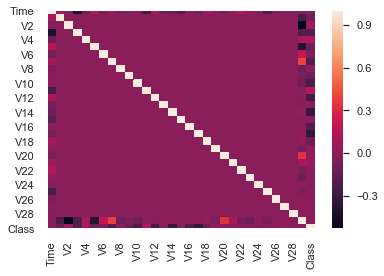

In [45]:
sns.set(style="white")
target = 'Class'
print(corr_matrix[target].sort_values(ascending=False))
corr_matrix = df.corr()
ax = sns.heatmap(corr_matrix)

As we can see from the map and the list of values, there is no significant correlation between the target and the features, to the extent that any of the values need be excluded. However, from other analyses I have done on other training models prior to my final work, there is pne feature (V14) which comes out as 8x more significant that others. The code for this can be found on my GitHub, but I have excluded it from this final modelling process

In [14]:
y = df['Class']
x = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
# Removed v14 due to over significance of features
# Splitting the dataset into target (y) and list of features to be examined (x)

In [15]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x))
# The data mj

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state=42)
print(pd.Series(y_train).value_counts())

0    227451
1       394
Name: Class, dtype: int64


In [17]:
x_train_initial, x_test, y_train_initial, y_test = train_test_split(x_scaled, 
                                                                    y, 
                                                                    test_size=0.2, 
                                                                    random_state=42)
print(pd.Series(y_train_initial).value_counts())

0    227451
1       394
Name: Class, dtype: int64


In [18]:
x_train, x_val, y_train, y_val = train_test_split(x_train_initial, 
                                                  y_train_initial, 
                                                  test_size=0.2,
                                                  random_state=42)
skf = StratifiedKFold(n_splits=5,random_state=42)

In [19]:
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_sample(x_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original class distribution: 

0    284315
1       492
Name: Class, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    181946
0    181946
Name: Class, dtype: int64


Model - Random Forest

In [20]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(x_train_resampled, y_train_resampled)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
forest.score(x_train_resampled, y_train_resampled)

0.9411253888516373

Final Model Viz + Roc/Auc curve

In [22]:
skf = StratifiedKFold(n_splits=5,random_state=42)
y_prob = cross_val_predict(forest ,x_train_resampled,y_train_resampled,method='predict_proba', cv=skf)[:,1]


In [23]:
fpr,tpr,threshold = roc_curve(y_train_resampled, y_prob)

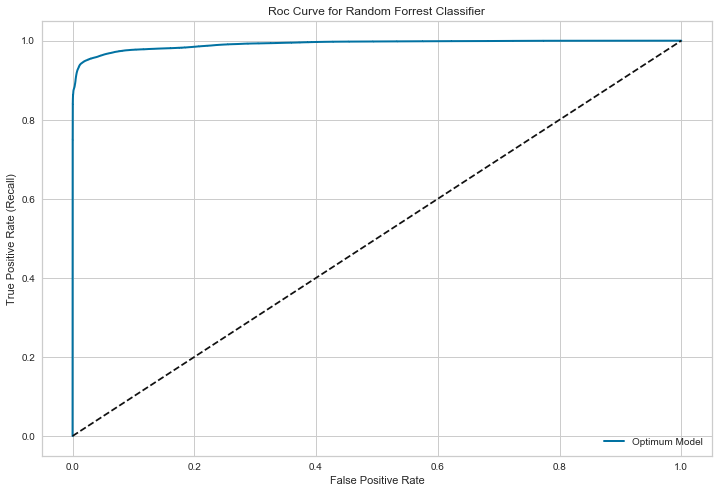

In [24]:
def plot_roc_curve(fpr, tpr, label=None):
    fig = plt.figure(figsize=(12,8))
    plt.plot(fpr,tpr,linewidth= 2, label=label)
    plt.plot([0,1], [0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Roc Curve for Random Forrest Classifier')
    plt.legend(loc=4)

plot_roc_curve(fpr, tpr, label='Optimum Model')
plt.show()

In [25]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

feature_importances = np.mean([
    tree.feature_importances_ for tree in forest
], axis=0)

In [26]:
feature_importance = pd.DataFrame(feature_importances)
feature_importance.rename(columns={0:'Importance'}, inplace=True)
feature_importance['Feature'] =x_train.columns
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance)

    Importance  Feature
10    0.225141       10
4     0.136398        4
16    0.132600       16
12    0.122070       12
11    0.097036       11
3     0.076582        3
2     0.047818        2
15    0.046620       15
7     0.027037        7
17    0.014753       17
6     0.013124        6
9     0.013070        9
20    0.010435       20
18    0.006954       18
8     0.005655        8
5     0.004889        5
19    0.003780       19
1     0.003514        1
28    0.002547       28
25    0.001905       25
26    0.001879       26
27    0.001640       27
23    0.000794       23
21    0.000733       21
22    0.000714       22
0     0.000671        0
13    0.000608       13
14    0.000579       14
24    0.000452       24


In [27]:
top_20_features = feature_importance.head(20)

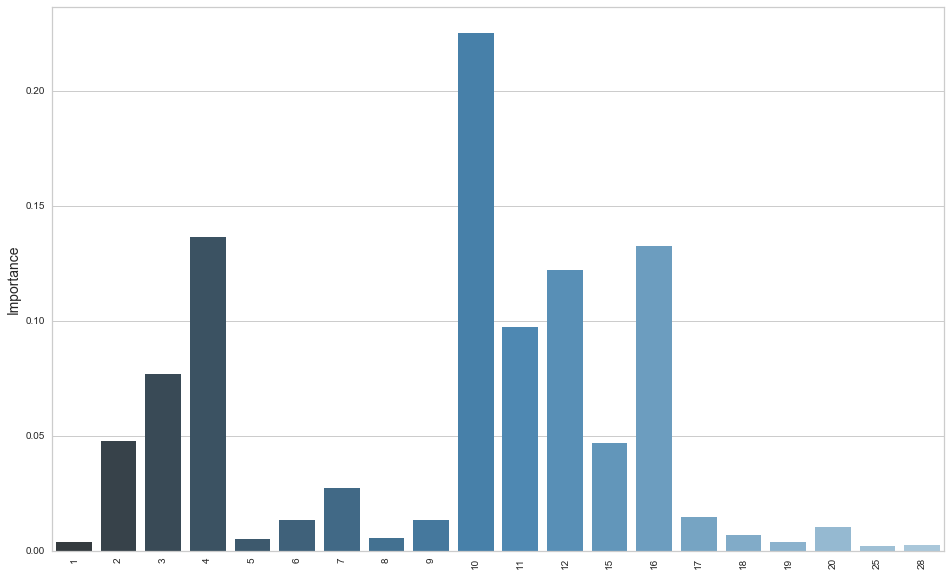

In [28]:
plt.figure(figsize=(16,10))
sns.barplot(x='Feature', y='Importance', data=top_20_features, palette="Blues_d")
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel('Importance', fontsize=14)
plt.show()
